In [140]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Sampler for loose Self Avoiding Walks (SAW)

We define a **loose** SAW as a SAW that is allowed to be stuck, i.e. a **loose** SAW of length $L$ may move for $C$ steps, where $C < L$ before having no possible moves.

In [133]:
# Returns a list of possible next coordinates
def get_candidates(coord, visited):
    candidates = []
    
    for dx, dy in [(0, -1), (0, 1), (-1, 0), (1, 0)]:
        new_coord = (coord[0] + dx, coord[1] + dy)
        if new_coord not in visited:
            candidates.append(new_coord)
    return candidates


# Generates a loose SAW of length L
def generate_loose_saw(L):
    coords = [(0, 0)]
    visited = set(coords)
    while len(coords) <= L:
        candidates = get_candidates(coords[-1], visited)
        if len(candidates) == 0: # no possible moves, keep still
            coords += [coords[-1]]*(L+1-len(coords))
            break
        coords.append(random.choice(candidates))
        visited.add(coords[-1])
    return coords


In [134]:
print("Generated loose SAW of length 10:")
print(generate_loose_saw(10))

print("\nGenerated stuck SAW of length 10:")
stuck_example = None
while stuck_example == None:
    curr = generate_loose_saw(10)
    if len(curr) != len(set(curr)):
        stuck_example = curr
print(stuck_example)


Generated loose SAW of length 10:
[(0, 0), (1, 0), (1, -1), (2, -1), (2, 0), (3, 0), (4, 0), (5, 0), (5, 1), (5, 2), (6, 2)]

Generated stuck SAW of length 10:
[(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 1), (2, 0), (1, 0), (1, 1), (1, 1), (1, 1)]


# Estimating $c_L$

Using the loose SAW sampler, we can estimate $c_L$ with importance sampling. To do so, we first sample n loose SAW and weight each walk based on its survival probability, i.e. a higher survival probability would give it higher weightage.

$W_i = \prod^L_{t=1} m_t$, where $m_t$ is the number of valid moves at step $t$.

The estimate for $c_L$ is then $c_L \approx \frac{1}{n} \sum^n_{i=1} W_i$

In [135]:
def get_weight(walk):
    visited = set()
    product = 1
    for coord in walk[:-1]:
        visited.add(coord)
        m = len(get_candidates(coord, visited))
        product *= m
        if product == 0: # early termination
            break
    return product

def estimate_c_L(L, n):
    total_weight = 0
    for _ in range(n):
        walk = generate_loose_sarw(L)
        total_weight += get_weight(walk)
    return total_weight / n

In [ ]:
plt.savefig("basic_mc_2.png")

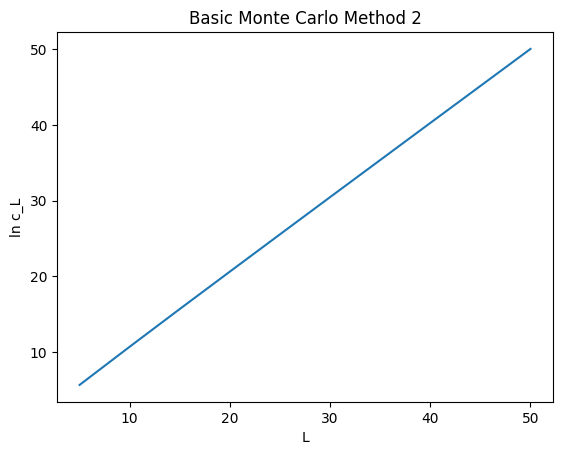

In [146]:
X = range(5, 51, 5)
Y = [estimate_c_L(L, 500_000) for L in X]
plt.plot(X, np.log(Y))
plt.title("Basic Monte Carlo Method 2")
plt.xlabel("L")
plt.ylabel("ln c_L")
plt.savefig("diagrams/basic_mc_2.png")
plt.show()

In [147]:
for x, y in zip(X, Y):
    print(f"L = {x}, c_L = {y}")

L = 5, c_L = 284.07564
L = 10, c_L = 44097.396624
L = 15, c_L = 6430955.655384
L = 20, c_L = 898224894.731736
L = 25, c_L = 123457757279.64531
L = 30, c_L = 16786146668536.078
L = 35, c_L = 2243926353453718.0
L = 40, c_L = 3.0103136852127296e+17
L = 45, c_L = 3.981546421375573e+19
L = 50, c_L = 5.305433390955165e+21
